# Machine Learning in Agriculture

Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in agricultural operational environments.

Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted in the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks pick up the harvest determining the ripeness with the help of computer vision.

# The Toxic Pesticides
Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

# Data description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#lets load the agriculture data
test=pd.read_csv('test_agriculture.csv')
train=pd.read_csv('train_agriculture.csv')

In [3]:
#loading test data
test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [4]:
#loading train data
train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [5]:
#making the source columns and concating both train and test data.
train['source']='train'
test['source']='test'
test['Crop_Damage']= 0
data=pd.concat([test,train],ignore_index=True)
print(train.shape,test.shape,data.shape) # we can see all the data is been added together

(4599, 11) (1199, 11) (5798, 11)


In [6]:
#my new data
data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,source,Crop_Damage
0,F00000002,188,1,1,1,0,NaN,0,2,test,0
1,F00000007,410,1,1,1,0,0.0,0,2,test,0
2,F00000011,626,1,0,1,0,0.0,0,2,test,0
3,F00000013,731,1,0,1,0,0.0,0,2,test,0
4,F00000014,789,0,0,1,0,0.0,0,1,test,0
...,...,...,...,...,...,...,...,...,...,...,...
5793,F00008078,2138,0,1,2,20,NaN,1,1,train,1
5794,F00008079,2139,0,1,2,30,47.0,2,1,train,1
5795,F00008080,2267,0,1,2,10,7.0,27,2,train,0
5796,F00008082,2267,0,1,2,10,20.0,24,2,train,0


In [7]:
#lets check columns for null values.
data.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          561
Number_Weeks_Quit            0
Season                       0
source                       0
Crop_Damage                  0
dtype: int64

# Summary statistics

In [8]:
data.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5237.000000,5798.000000,5798.000000,5798.000000
mean,1347.643153,0.218524,0.472232,2.304243,26.493618,28.920374,8.760262,1.891687,0.154191
std,821.330403,0.413280,0.499271,0.484594,15.655508,12.625594,9.582781,0.692997,0.412449
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1132.000000,0.000000,0.000000,2.000000,20.000000,28.000000,6.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,15.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [9]:
#lets check the datatypes
data.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
source                      object
Crop_Damage                  int64
dtype: object

# Lets check correlation 

In [10]:
data.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.024004,-0.190848,-0.015056,-0.122206,0.464096,0.228822,-0.002287,0.182373
Crop_Type,-0.024004,1.000000,-0.127340,0.373412,-0.164966,0.011204,-0.290973,0.003754,0.024936
Soil_Type,-0.190848,-0.127340,1.000000,0.044193,0.051543,-0.108561,-0.062686,-0.005204,-0.048734
Pesticide_Use_Category,-0.015056,0.373412,0.044193,1.000000,-0.006929,0.396223,-0.574041,0.009279,0.153633
Number_Doses_Week,-0.122206,-0.164966,0.051543,-0.006929,1.000000,0.109537,-0.024209,0.002751,-0.016304
Number_Weeks_Used,0.464096,0.011204,-0.108561,0.396223,0.109537,1.000000,-0.448672,-0.004887,0.212812
Number_Weeks_Quit,0.228822,-0.290973,-0.062686,-0.574041,-0.024209,-0.448672,1.000000,0.010324,-0.118133
Season,-0.002287,0.003754,-0.005204,0.009279,0.002751,-0.004887,0.010324,1.000000,-0.012775
Crop_Damage,0.182373,0.024936,-0.048734,0.153633,-0.016304,0.212812,-0.118133,-0.012775,1.000000


<AxesSubplot:>

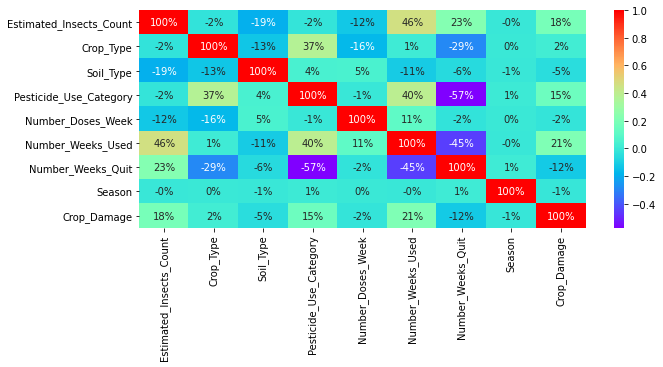

In [11]:
plt.figure(figsize=(10,4))
sns.heatmap(data.corr(),annot=True,fmt='.0%',cmap='rainbow')

Text(0.5, 1.0, 'Corelation with Target variables')

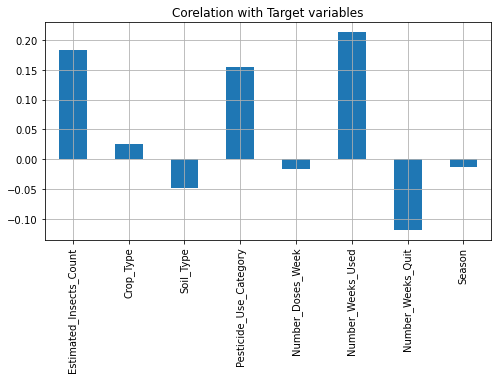

In [12]:
plt.figure(figsize=(8,4))
data.drop('Crop_Damage',axis=1).corrwith(data['Crop_Damage']).plot(kind='bar',grid=True)
plt.title('Corelation with Target variables')

# Univariate Analysis.

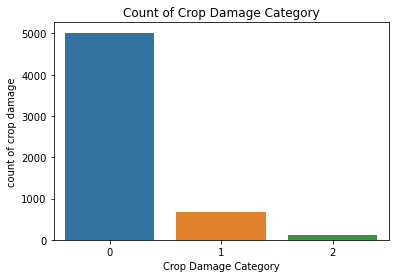

0    5019
1     664
2     115
Name: Crop_Damage, dtype: int64

0 for alive 	 1 for Damage due to oyher causes 	 2 for damage due to Pesticides


In [13]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Crop_Damage',data=data)
plt.title('Count of Crop Damage Category')
plt.xlabel('Crop Damage Category')
plt.ylabel('count of crop damage')
plt.show()
print(data['Crop_Damage'].value_counts())
print()
print('0 for alive','\t','1 for Damage due to oyher causes','\t','2 for damage due to Pesticides')

In [14]:
data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,source,Crop_Damage
0,F00000002,188,1,1,1,0,NaN,0,2,test,0
1,F00000007,410,1,1,1,0,0.0,0,2,test,0
2,F00000011,626,1,0,1,0,0.0,0,2,test,0
3,F00000013,731,1,0,1,0,0.0,0,2,test,0
4,F00000014,789,0,0,1,0,0.0,0,1,test,0


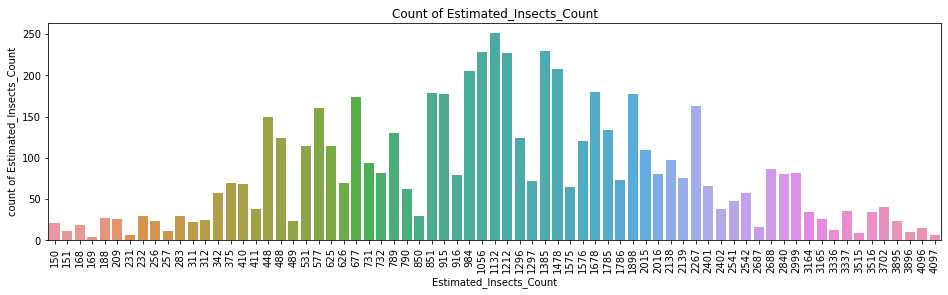

In [15]:
plt.subplots(figsize=(16,4))
sns.countplot(x='Estimated_Insects_Count',data=data)
plt.title('Count of Estimated_Insects_Count')
plt.xlabel('Estimated_Insects_Count')
plt.ylabel('count of Estimated_Insects_Count')
plt.xticks(rotation=90)
plt.show()

0    4531
1    1267
Name: Crop_Type, dtype: int64


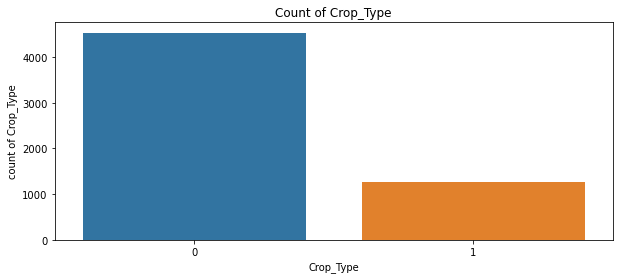

In [16]:
plt.subplots(figsize=(10,4))
sns.countplot(x='Crop_Type',data=data)
plt.title('Count of Crop_Type')
plt.xlabel('Crop_Type')
plt.ylabel('count of Crop_Type')
print(data['Crop_Type'].value_counts())
plt.show()

0    3060
1    2738
Name: Soil_Type, dtype: int64


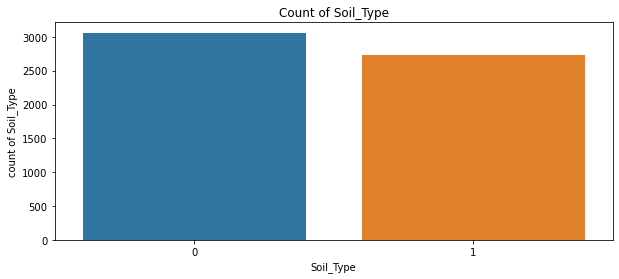

In [17]:
plt.subplots(figsize=(10,4))
sns.countplot(x='Soil_Type',data=data)
plt.title('Count of Soil_Type')
plt.xlabel('Soil_Type')
plt.ylabel('count of Soil_Type')
print(data['Soil_Type'].value_counts())
plt.show()

2    3900
3    1831
1      67
Name: Pesticide_Use_Category, dtype: int64


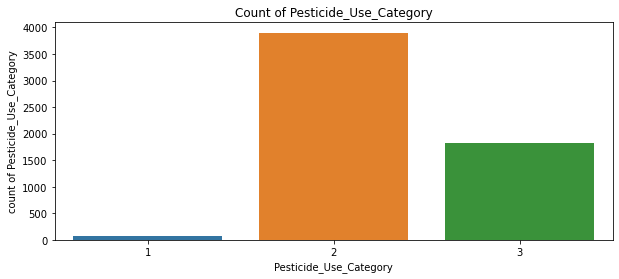

In [18]:
plt.subplots(figsize=(10,4))
sns.countplot(x='Pesticide_Use_Category',data=data)
plt.title('Count of Pesticide_Use_Category')
plt.xlabel('Pesticide_Use_Category')
plt.ylabel('count of Pesticide_Use_Category')
print(data['Pesticide_Use_Category'].value_counts())
plt.show()

2    2946
1    1740
3    1112
Name: Season, dtype: int64


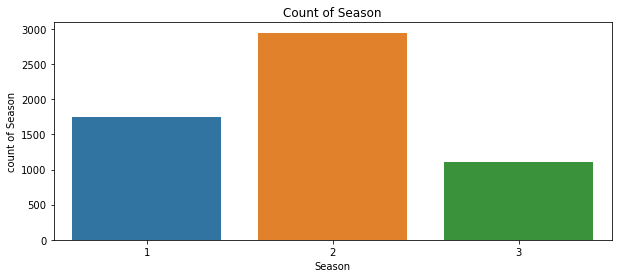

In [19]:
plt.subplots(figsize=(10,4))
sns.countplot(x='Season',data=data)
plt.title('Count of Season')
plt.xlabel('Season')
plt.ylabel('count of Season')
print(data['Season'].value_counts())
plt.show()

# Bivariate analysis

# crop_type vs crop_damage

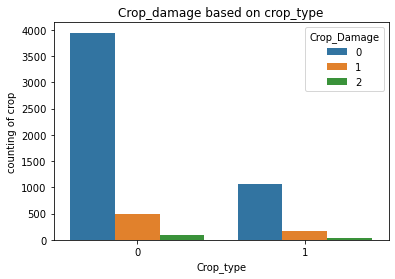

Crop_Type  Crop_Damage
0          0              3945
           1               498
           2                88
1          0              1074
           1               166
           2                27
Name: Crop_Damage, dtype: int64


In [20]:
sns.countplot(x='Crop_Type',hue='Crop_Damage',data=data)
plt.title('Crop_damage based on crop_type')
plt.xlabel('Crop_type')
plt.ylabel('counting of crop')
plt.show()

print(data.groupby('Crop_Type')['Crop_Damage'].value_counts())

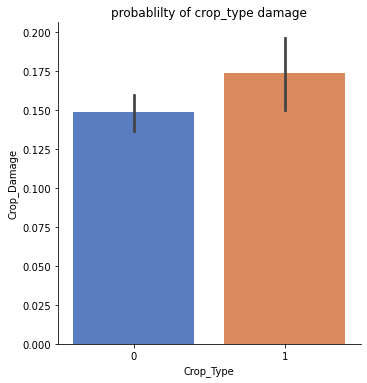

In [21]:
#factor plot of crop_type vs crop_damage
sns.factorplot(x='Crop_Type',y='Crop_Damage',data=data,kind='bar',palette='muted',size=5,aspect=1)
plt.title('probablilty of crop_type damage')
plt.show()

# Soil_Type vs crop_damage

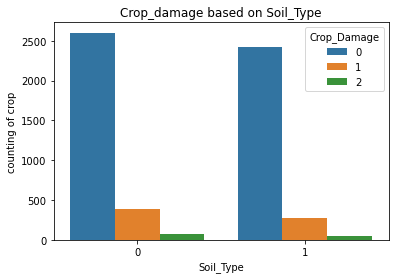

Soil_Type  Crop_Damage
0          0              2600
           1               390
           2                70
1          0              2419
           1               274
           2                45
Name: Crop_Damage, dtype: int64


In [22]:
sns.countplot(x='Soil_Type',hue='Crop_Damage',data=data)
plt.title('Crop_damage based on Soil_Type')
plt.xlabel('Soil_Type')
plt.ylabel('counting of crop')
plt.show()

print(data.groupby('Soil_Type')['Crop_Damage'].value_counts())

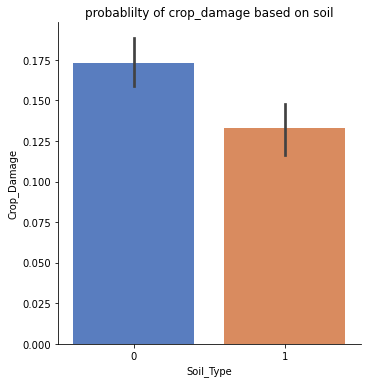

In [23]:
#factor plot of soil_type vs crop_damage
sns.factorplot(x='Soil_Type',y='Crop_Damage',data=data,kind='bar',palette='muted',size=5,aspect=1)
plt.title('probablilty of crop_damage based on soil')
plt.show()

# Pesticide_Use_Category vs crop_damage

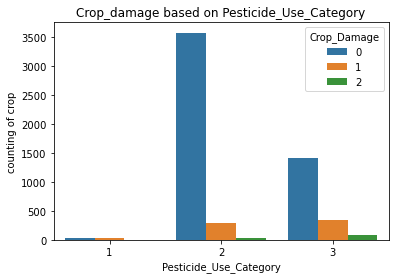

Pesticide_Use_Category  Crop_Damage
1                       1                33
                        0                29
                        2                 5
2                       0              3576
                        1               290
                        2                34
3                       0              1414
                        1               341
                        2                76
Name: Crop_Damage, dtype: int64


In [24]:
sns.countplot(x='Pesticide_Use_Category',hue='Crop_Damage',data=data)
plt.title('Crop_damage based on Pesticide_Use_Category')
plt.xlabel('Pesticide_Use_Category')
plt.ylabel('counting of crop')
plt.show()

print(data.groupby('Pesticide_Use_Category')['Crop_Damage'].value_counts())

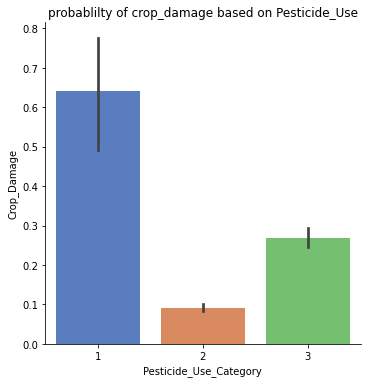

In [25]:
#factor plot of Pesticide_Use_Category vs crop_damage
sns.factorplot(x='Pesticide_Use_Category',y='Crop_Damage',data=data,kind='bar',palette='muted',size=5,aspect=1)
plt.title('probablilty of crop_damage based on Pesticide_Use')
plt.show()


In [26]:
# Season Category vs crop_damage

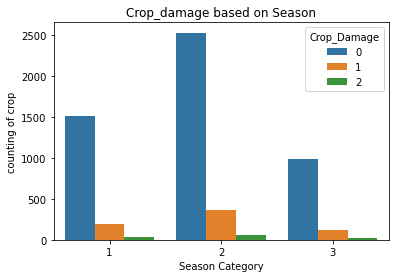

Season  Crop_Damage
1       0              1511
        1               192
        2                37
2       0              2527
        1               358
        2                61
3       0               981
        1               114
        2                17
Name: Crop_Damage, dtype: int64


In [27]:
sns.countplot(x='Season',hue='Crop_Damage',data=data)
plt.title('Crop_damage based on Season')
plt.xlabel('Season Category')
plt.ylabel('counting of crop')
plt.show()

print(data.groupby('Season')['Crop_Damage'].value_counts())

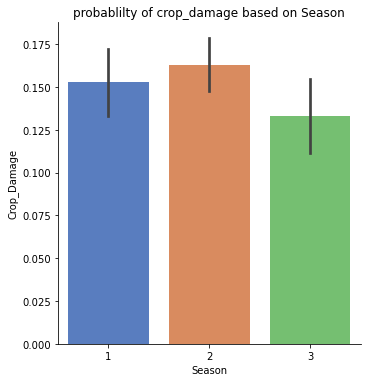

In [28]:
#factor plot of Season vs crop_damage
sns.factorplot(x='Season',y='Crop_Damage',data=data,kind='bar',palette='muted',size=5,aspect=1)
plt.title('probablilty of crop_damage based on Season')
plt.show()

In [29]:
data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,source,Crop_Damage
0,F00000002,188,1,1,1,0,NaN,0,2,test,0
1,F00000007,410,1,1,1,0,0.0,0,2,test,0
2,F00000011,626,1,0,1,0,0.0,0,2,test,0
3,F00000013,731,1,0,1,0,0.0,0,2,test,0
4,F00000014,789,0,0,1,0,0.0,0,1,test,0
...,...,...,...,...,...,...,...,...,...,...,...
5793,F00008078,2138,0,1,2,20,NaN,1,1,train,1
5794,F00008079,2139,0,1,2,30,47.0,2,1,train,1
5795,F00008080,2267,0,1,2,10,7.0,27,2,train,0
5796,F00008082,2267,0,1,2,10,20.0,24,2,train,0


# Multivariate analysis

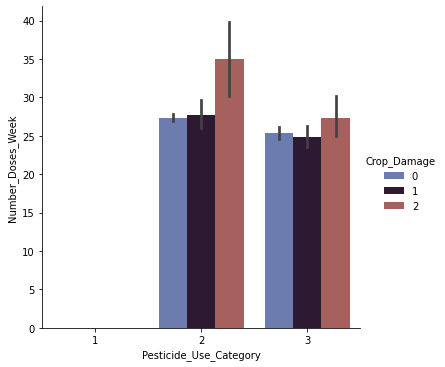

In [30]:
sns.factorplot(x='Pesticide_Use_Category',y='Number_Doses_Week',hue='Crop_Damage',palette='twilight',data=data,kind='bar')

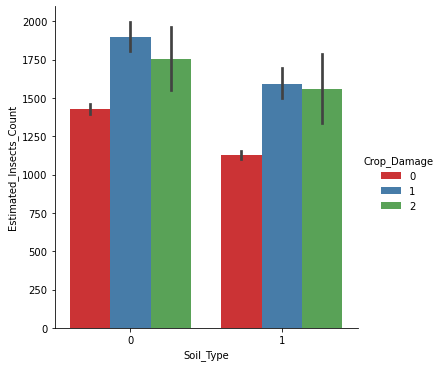

In [31]:
sns.factorplot(x='Soil_Type',y='Estimated_Insects_Count',hue='Crop_Damage',palette='Set1',data=data,kind='bar')

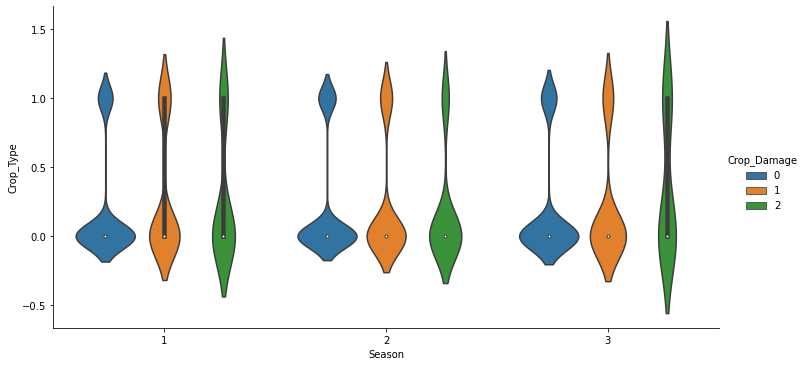

In [32]:
g=sns.catplot(x='Season',y='Crop_Type',hue='Crop_Damage',data=data,kind='violin',aspect=2)
plt.show()

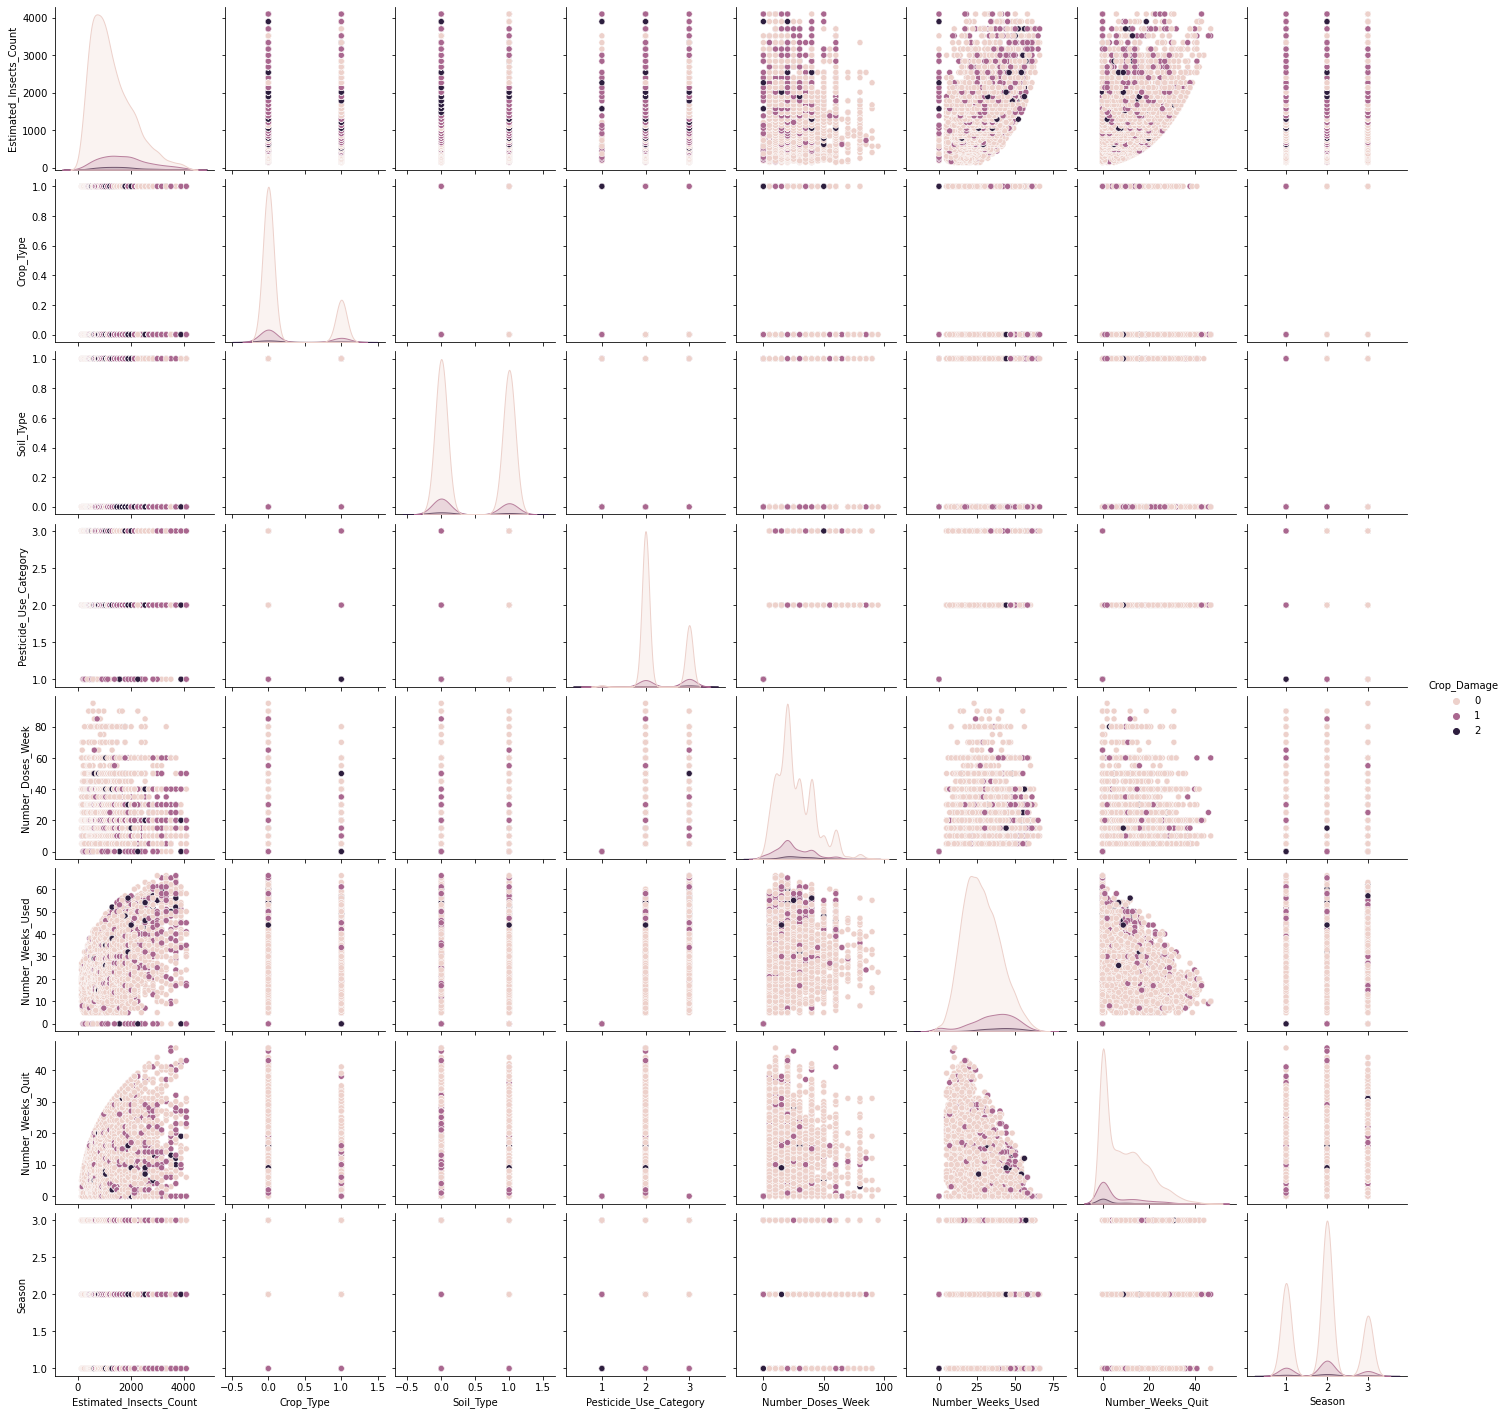

In [33]:
sns.pairplot(data,hue='Crop_Damage')
#below we can observe the pairplot.

In [34]:
# taking train data to train the model
new=train

In [35]:
#checking for any null value are present or not
new.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
source                       0
dtype: int64

In [36]:
#lets fill the number of weeks_uses with the mean of the column using simple imputer
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
new['Number_Weeks_Used']=imp.fit_transform(new['Number_Weeks_Used'].values.reshape(-1,1)) # reshape is just to neglect any error value
new.isnull().sum()
# we can observe there is no nullvalue present in the dataset.

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
source                     0
dtype: int64

In [37]:
#Before moving further to check skewness and other stuff lets drop ID object column and Source which we setted just to diffrentiate the train and test data.
new.drop(['ID','source'],axis=1,inplace=True)

# To check distribution of skewness

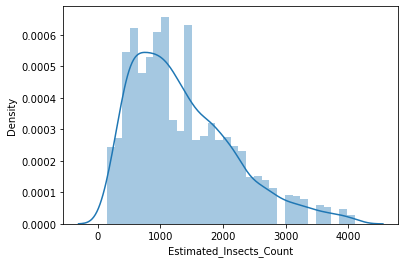

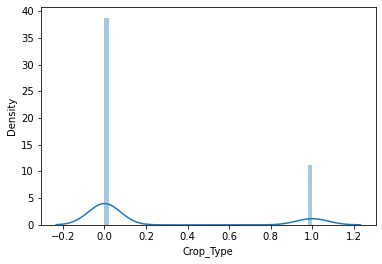

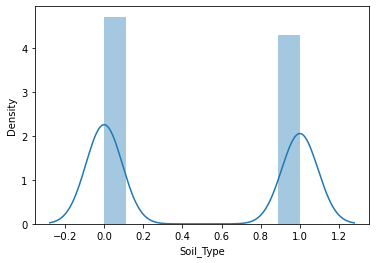

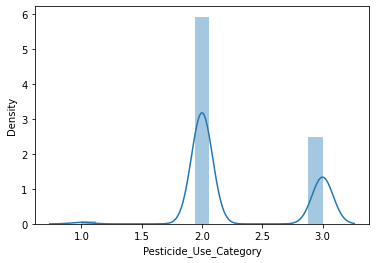

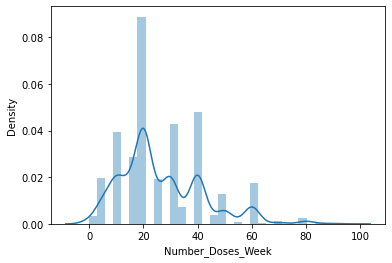

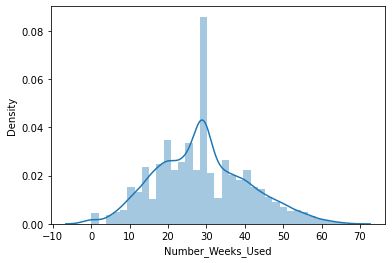

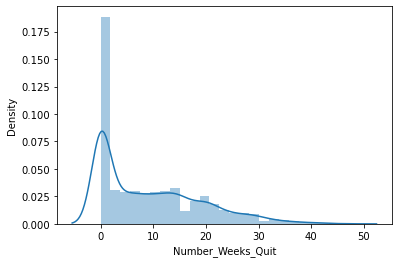

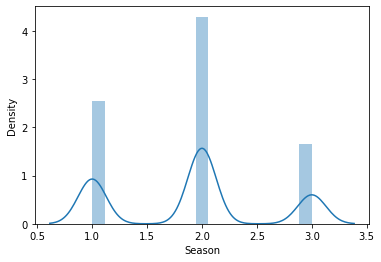

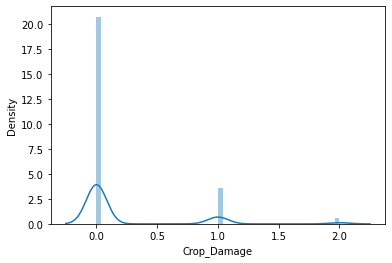

In [38]:
for i in new.columns:
    sns.distplot(new[i])
    plt.show()
# we can observe below that some of the columns are almost normally distributed.

# check skewness

In [39]:
# Now let check the skewness and try to remove the skewness.
new.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [40]:
# lets apply log transformation and treat the skewd data
for col in new.columns:
    if new.skew().loc[col]>0.55:
        new[col]=np.sqrt(new[col])

In [41]:
# we can observe the data is much more skewed.
new.skew()

Estimated_Insects_Count    0.257248
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.494443
Number_Doses_Week         -0.002742
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.054299
Season                     0.144841
Crop_Damage                1.868685
dtype: float64

# Removing Outliers

In [42]:
#lets remove the outliers using zscore
from scipy.stats import zscore
z=abs(zscore(new))
print(new.shape)
new_data=new.loc[(z<3).all(axis=1)]
print(new_data.shape)
# we can observe the new zscore down below.

(4599, 9)
(4437, 9)


# Model Training

In [43]:
# lets sepearate input output columns
df_x=new_data.drop(columns=['Crop_Damage']) # Input variable.
y=pd.DataFrame(new_data['Crop_Damage']) #Target Variable.

In [44]:
# lets scale the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x
# WE CAN NOTICE OUR DATA IS BEEN SCALED.

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-2.106191,-0.534522,-0.957408,1.581763,0.358354,-0.245874,-1.250203,0.149516
1,-2.102434,-0.534522,-0.957408,1.581763,0.934756,-0.766009,-1.250203,-1.286417
2,-2.106191,-0.534522,-0.957408,1.581763,1.901681,-1.199454,-1.250203,0.149516
3,-2.040367,-0.534522,1.044486,1.581763,-0.325366,-1.286143,-1.250203,0.149516
4,-2.040367,-0.534522,1.044486,1.581763,-0.325366,-1.199454,-1.250203,0.149516
...,...,...,...,...,...,...,...,...
4432,1.027331,-0.534522,1.044486,-0.632206,-0.325366,0.004746,-0.729538,-1.286417
4433,1.028328,-0.534522,1.044486,-0.632206,0.358354,1.574595,-0.513871,-1.286417
4434,1.154043,-0.534522,1.044486,-0.632206,-1.216406,-1.892966,1.455255,0.149516
4435,1.154043,-0.534522,1.044486,-0.632206,-1.216406,-0.766009,1.300527,0.149516


In [45]:
#lets again check the skewness
x.skew()

Estimated_Insects_Count    0.257846
Crop_Type                  1.336758
Soil_Type                  0.087108
Pesticide_Use_Category     0.949878
Number_Doses_Week          0.267764
Number_Weeks_Used          0.350445
Number_Weeks_Quit          0.010668
Season                     0.143651
dtype: float64

In [46]:
# Breaking our input and target data into train and test data.
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42,stratify=y)


In [47]:
#importing varios classification model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [48]:
# saving different algorithm with respective name
KNN=KNeighborsClassifier()
SVC=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()

In [49]:
models= []
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SVC))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [50]:
from sklearn.metrics import accuracy_score,roc_curve,auc,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,cross_val_predict
import seaborn as sns

****************************** KNeighborsClassifier ***************************


KNeighborsClassifier(n_neighbors=6)


accuracy_score= 0.8355855855855856


cross_val_score 0.8210684725357412


roc_auc_score =  0.5365579302587177


classification_report               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       762
         1.0       0.30      0.12      0.17       126

    accuracy                           0.84       888
   macro avg       0.58      0.54      0.54       888
weighted avg       0.79      0.84      0.80       888



[[727  35]
 [111  15]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


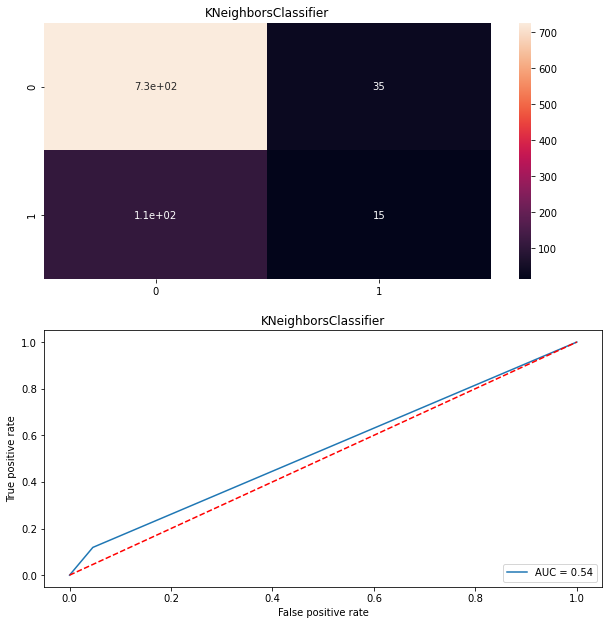





****************************** SVC ***************************


SVC()


accuracy_score= 0.8468468468468469


cross_val_score 0.8381932157891526


roc_auc_score =  0.5033745781777277


classification_report               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       762
         1.0       0.19      0.02      0.04       126

    accuracy                           0.85       888
   macro avg       0.52      0.50      0.48       888
weighted avg       0.76      0.85      0.79       888



[[749  13]
 [123   3]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


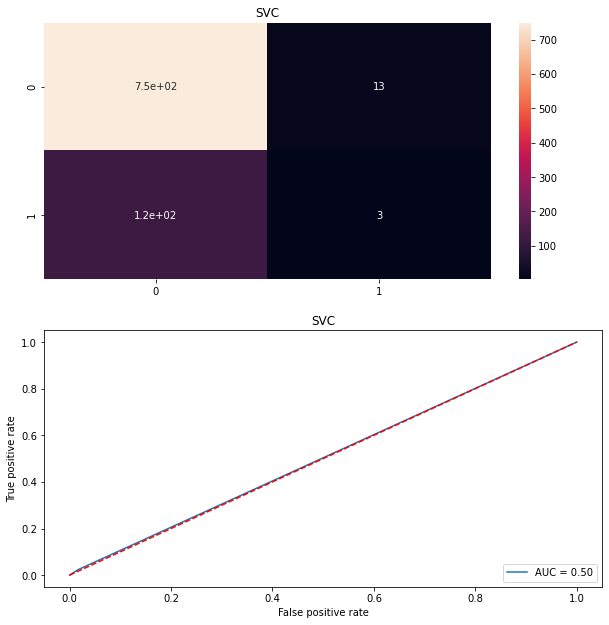





****************************** LogisticRegression ***************************


LogisticRegression()


accuracy_score= 0.8524774774774775


cross_val_score 0.8436001464218169


roc_auc_score =  0.5199037620297463


classification_report               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       762
         1.0       0.37      0.06      0.10       126

    accuracy                           0.85       888
   macro avg       0.62      0.52      0.51       888
weighted avg       0.79      0.85      0.80       888



[[750  12]
 [119   7]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


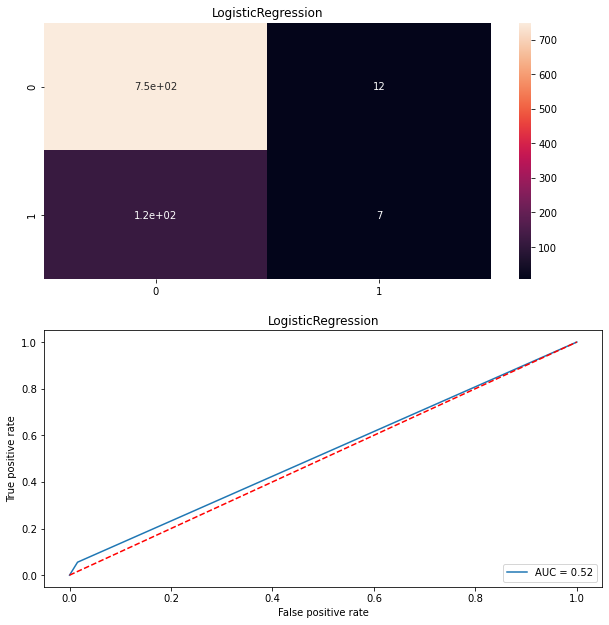





****************************** DecisionTreeClassifier ***************************


DecisionTreeClassifier(random_state=6)


accuracy_score= 0.7894144144144144


cross_val_score 0.7174099607508186


roc_auc_score =  0.585833020872391


classification_report               precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       762
         1.0       0.28      0.30      0.29       126

    accuracy                           0.79       888
   macro avg       0.58      0.59      0.58       888
weighted avg       0.80      0.79      0.79       888



[[663  99]
 [ 88  38]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


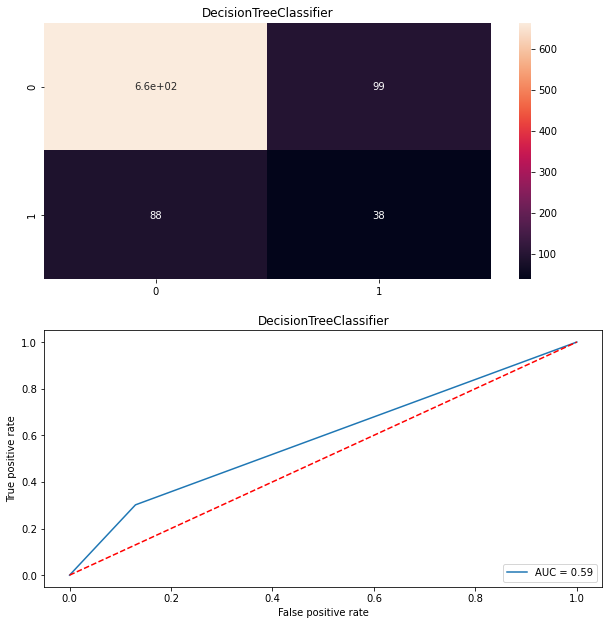





****************************** GaussianNB ***************************


GaussianNB()


accuracy_score= 0.8277027027027027


cross_val_score 0.7753584284058325


roc_auc_score =  0.6048306461692289


classification_report               precision    recall  f1-score   support

         0.0       0.89      0.92      0.90       762
         1.0       0.37      0.29      0.33       126

    accuracy                           0.83       888
   macro avg       0.63      0.60      0.61       888
weighted avg       0.81      0.83      0.82       888



[[698  64]
 [ 89  37]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


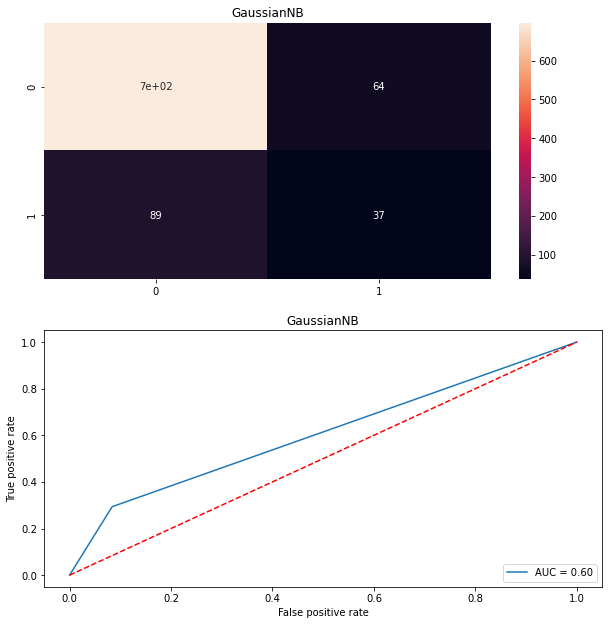

In [51]:
# lets make the for loop and call the algorithm one by one and save data to respective model using append function.
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,50))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
    print('\n\n\n')


In [52]:
# saving the result to a single datframe.
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs,'roc_auc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,roc_auc_score
0,KNeighborsClassifier,83.558559,82.106847,53.655793
1,SVC,84.684685,83.819322,50.337458
2,LogisticRegression,85.247748,84.360015,51.990376
3,DecisionTreeClassifier,78.941441,71.740996,58.583302
4,GaussianNB,82.770270,77.535843,60.483065


In [53]:
# lets apply grid search cv in Logistic regression
from sklearn.model_selection import GridSearchCV
parameter={'C':[1,10],'random_state':range(42,100)}
lg=LogisticRegression()
lg=GridSearchCV(estimator=lg,param_grid=parameter,cv=5)
lg.fit(x_train,y_train)
print(lg.best_params_)
print(lg.best_score_)

{'C': 10, 'random_state': 42}
0.8548886549196448


In [54]:
lg=LogisticRegression(random_state=42,C=10)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("Accuracy for logistic regression: ",accuracy_score(y_test,pred)*100)
print('Cross validation score with logistic regression :',cross_val_score(lg,x,y,cv=5,scoring='accuracy').mean()*100)

Accuracy for logistic regression:  85.24774774774775
Cross validation score with logistic regression : 85.01287364026935


In [55]:
# lets cgeck svc with grid search cv
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters={'kernel':('linear','rbf'),'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc, parameters)
clf.fit(x_train,y_train)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.8610882218558175
rbf
{'C': 1, 'kernel': 'rbf'}


In [56]:
svc=svm.SVC(kernel='rbf',C=1)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print("Accuracy for svc classifier on CV data: ",accuracy_score(y_test,pred)*100)
print('Cross validation score with SVC :',cross_val_score(svc,x,y,cv=5,scoring='accuracy').mean()*100)

Accuracy for svc classifier on CV data:  84.68468468468468
Cross validation score with SVC : 85.41827904567477


# Using Ensemble boosting Technique, with grid search cv.

In [57]:
# lets find the best parameter using ensemble techniques.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
parameters={'n_estimators':[10,100,500,1000],'criterion' :['gini', 'entropy']}
rfc=GridSearchCV(estimator=rfc,param_grid=parameters,cv=5)
rfc.fit(x_train,y_train)
print(rfc.best_params_)
print(rfc.best_score_)

{'criterion': 'entropy', 'n_estimators': 100}
0.8453092035995947


In [58]:
rfc1=RandomForestClassifier(random_state=42,n_estimators=100,criterion='entropy')
rfc1.fit(x_train,y_train)
pred=rfc1.predict(x_test)
print("Accuracy for Random Forest classifier: ",accuracy_score(y_test,pred)*100)
print('Cross validation score with Random forest :',cross_val_score(rfc1,x,y,cv=5,scoring='accuracy').mean()*100)

Accuracy for Random Forest classifier:  84.34684684684684
Cross validation score with Random forest : 83.88573184232712


In [59]:
#lets apply Gradient boosting classifier.
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier(random_state=42)
parameters={'n_estimators':[10,100,500,1000],'learning_rate':[.001,0.01,.1]}
gbc=GridSearchCV(estimator=gbc,param_grid=parameters,cv=5)
gbc.fit(x_train,y_train)
print(gbc.best_params_)
print(gbc.best_score_)

{'learning_rate': 0.01, 'n_estimators': 500}
0.8588350980353205


In [60]:
gbc=GradientBoostingClassifier(random_state=42,n_estimators=500,learning_rate=0.01)
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print("Accuracy for Gradient boosting classifier: ",accuracy_score(y_test,predgbc)*100)
print('Cross validation score with Gradient boosting:',cross_val_score(gbc,x,y,cv=5,scoring='accuracy').mean()*100)

Accuracy for Gradient boosting classifier:  85.58558558558559
Cross validation score with Gradient boosting: 85.37328478422053


# observation

Prediction For Gradient boosting classifier [0. 0. 0. ... 0. 0. 0.]
AxesSubplot(0.125,0.125;0.775x0.755)


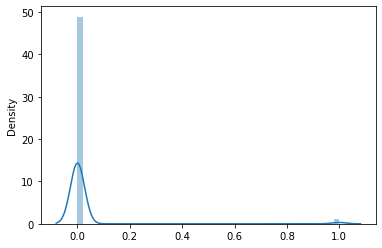

In [61]:
#Predicting result for Random Forest Classifier.
agri_prediction_gbc=gbc.predict(x)
print('Prediction For Gradient boosting classifier',agri_prediction_gbc)
print(sns.distplot([agri_prediction_gbc]))
plt.show()

In [62]:
# lets Save the model
import joblib
joblib.dump(gbc,'agriculture.pkl')

['agriculture.pkl']

# Lets save the predicted output to csv file.

In [64]:
#lets save the predicted result to excel file.
df=pd.DataFrame(agri_prediction_gbc)
df.to_csv('agriculture_Classification_prediction_result.csv')